In [15]:
import matplotlib.pyplot as plt
import pandas as pd

jan_01 = pd.read_csv('data_recorder/database/data_exports/paper_data/XBTUSD_2020-01-01.csv.xz' ,compression='xz')#, index_col='system_time')

In [102]:
def plot_ts(df):
    plt.plot(range(df.shape[0]),df['midpoint'])
    plt.title(df.index[3000][:10])
    plt.show()

In [32]:
from datetime import datetime as dt
from datetime import timedelta

start_date = dt(2020,1,1) #of fitting, ie training starts on one day later
basepath = 'data_recorder/database/data_exports/paper_data/XBTUSD_'
num_days = 8

paths = [basepath + (start_date+timedelta(i)).strftime("%Y-%m-%d") + '.csv.xz' 
         for i in range(num_days+1)]

In [51]:
def calc_summary_statistics(df):
    # calc hodl performance
    start_mean = df.midpoint[:60].mean()
    end_mean = df.midpoint[-60:].mean()
    hodl_mean = round((end_mean/start_mean-1)*100, 2)
    overall_mean = round(df.midpoint.mean(), 2)
    return hodl_mean, overall_mean

2020-01-02
-3.09 7078.84


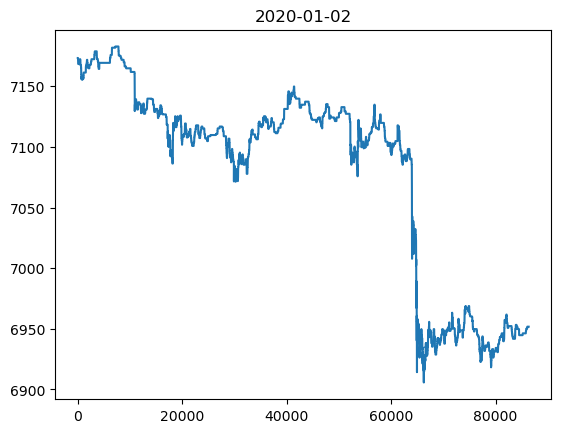

2020-01-03
4.96 7201.11


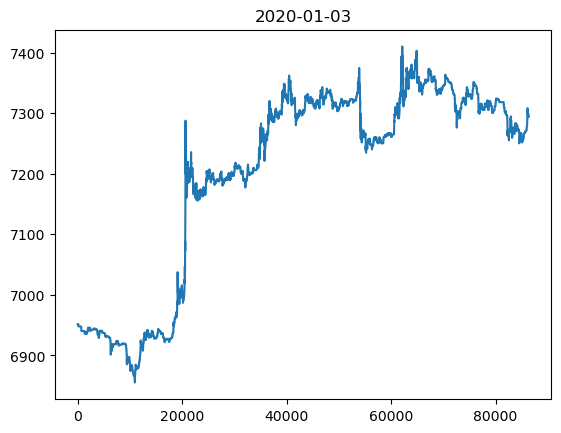

2020-01-04
0.62 7319.13


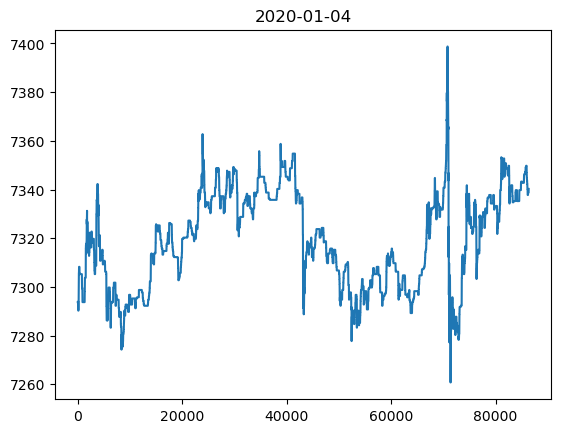

2020-01-05
0.01 7428.68


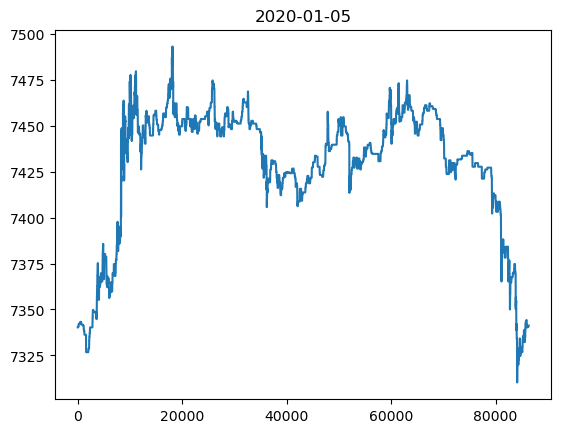

2020-01-06
5.18 7513.44


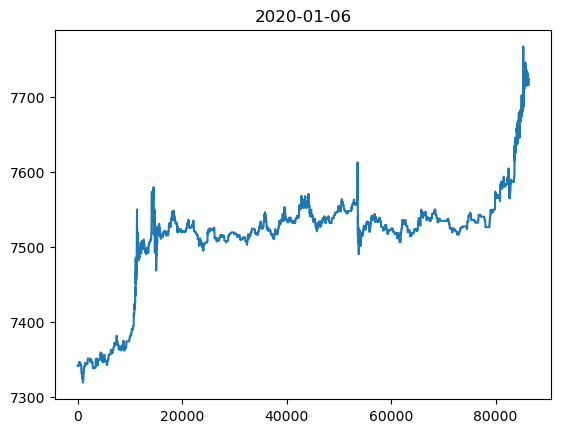

2020-01-07
4.14 7912.98


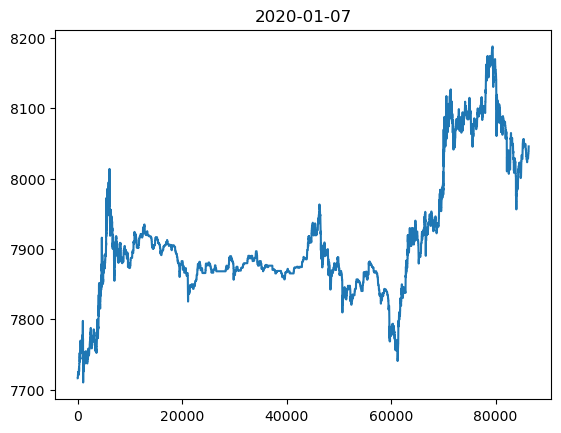

2020-01-08
0.25 8237.67


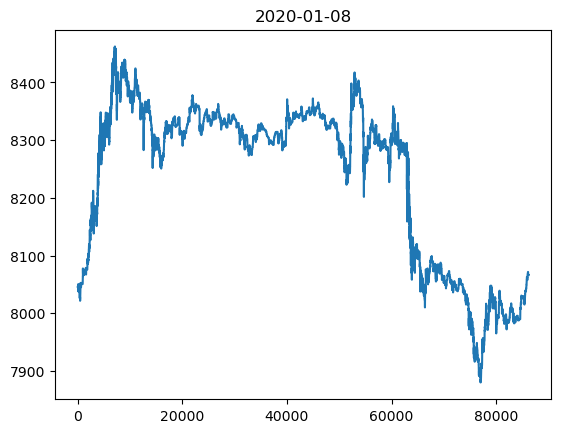

2020-01-09
-3.26 7910.34


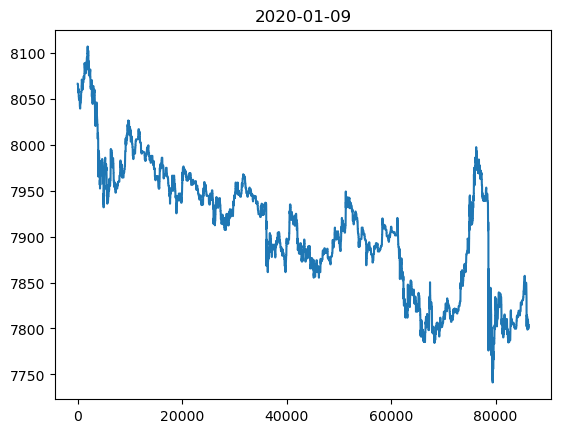

In [104]:
for path in paths[1:]:
    df = pd.read_csv(path, compression='xz', index_col=0)
    hodl, mean = calc_summary_statistics(df)
    print(df.index[3000][:10])
    print(hodl, mean)
    plot_ts(df)

<Axes: >

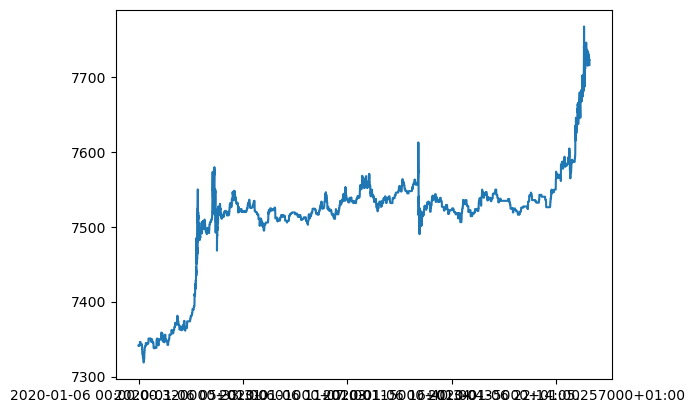

In [98]:
df.midpoint.plot()

In [60]:
algos = ['dqn', 'ppo', 'a2c']
start = dt(2020, 1, 9)
st_dict = {}
for a in algos:
    st_dict[a] = {}
    for i in range(10):
        st_dict[a][(start+timedelta(i)).date()] = 3
        
        
st_dict

{'dqn': {datetime.date(2020, 1, 9): 3,
  datetime.date(2020, 1, 10): 3,
  datetime.date(2020, 1, 11): 3,
  datetime.date(2020, 1, 12): 3,
  datetime.date(2020, 1, 13): 3,
  datetime.date(2020, 1, 14): 3,
  datetime.date(2020, 1, 15): 3,
  datetime.date(2020, 1, 16): 3,
  datetime.date(2020, 1, 17): 3,
  datetime.date(2020, 1, 18): 3},
 'ppo': {datetime.date(2020, 1, 9): 3,
  datetime.date(2020, 1, 10): 3,
  datetime.date(2020, 1, 11): 3,
  datetime.date(2020, 1, 12): 3,
  datetime.date(2020, 1, 13): 3,
  datetime.date(2020, 1, 14): 3,
  datetime.date(2020, 1, 15): 3,
  datetime.date(2020, 1, 16): 3,
  datetime.date(2020, 1, 17): 3,
  datetime.date(2020, 1, 18): 3},
 'a2c': {datetime.date(2020, 1, 9): 3,
  datetime.date(2020, 1, 10): 3,
  datetime.date(2020, 1, 11): 3,
  datetime.date(2020, 1, 12): 3,
  datetime.date(2020, 1, 13): 3,
  datetime.date(2020, 1, 14): 3,
  datetime.date(2020, 1, 15): 3,
  datetime.date(2020, 1, 16): 3,
  datetime.date(2020, 1, 17): 3,
  datetime.date(2020, 1

In [83]:
(109.90846164854499, 110.46498755038729)

(109.90846164854499, 110.46498755038729)

In [193]:
import pickle

with open('test_statistics_dict.pkl', 'rb') as f:
    x = pickle.load(f)

In [195]:
rl_balance = 100
hodl_balance = 100

for date in x['a2c'].keys():
    rl_balance *= (1 + x['a2c'][date]['episode pnl']/100)
    hodl_balance *= (1 + x['a2c'][date]['episode hodl pnl']/100)
rl_balance, hodl_balance

(107.83956258785116, 110.46498755038729)

In [135]:
rl_balance = 100
rl_balance *= (1+x['a2c'][dt(2020,1,30,0,0)]['episode pnl']/100)
rl_balance

100.68718675168216

In [273]:
with open('test_statistics_dict.pkl', 'rb') as f:
    x = pickle.load(f)

In [279]:
rewards = []
for k in x['a2c'].keys():
    rewards.append(x['a2c'][k]['episode hodl pnl'])

In [280]:
import numpy as np
np.mean(rewards)

0.5205

In [272]:
str(dt(2020,1,10,0,0).date())

'2020-01-10'

In [239]:
from datetime import datetime as dt
dict1 = x['a2c'][dt(2020,1,10,0,0)]
dict2 = {'episode reward': 1, 'episode pnl': 2, 'episode avg pnl': 3, 'episode hodl pnl': 4}

In [255]:
def merge_dicts(dict1, dict2):
    #assume that both dicts have the same keys, merge items of same key into a list
    for k in dict1.keys():
        if type(dict1[k]) == list:
            dict1[k].append(dict2[k])
        else:
            tmp_dict1_item = dict1[k].copy()
            dict1[k] = [tmp_dict1_item, dict2[k]]
    return dict1

{'episode reward': [0.6214483878279166, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'episode pnl': [-1.676730150991889, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'episode avg pnl': [-0.010337423865548022, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 'episode hodl pnl': [3.68, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]}

In [269]:
tmp_dct = {}
tmp_dct['a2c'] = {}
merge_dicts(tmp_dct['a2c']['heute'], dict2)

KeyError: 'heute'

In [259]:
x['a2c'][dt(2020,1,10,0,0)] = merge_dicts(x['a2c'][dt(2020,1,10,0,0)], dict2)

In [260]:
x['a2c'][dt(2020,1,10,0,0)]

{'episode reward': [10.110394104064031, 1, 1],
 'episode pnl': [1.7117790987830943, 2, 2],
 'episode avg pnl': [0.0737835818440989, 3, 3],
 'episode hodl pnl': [3.68, 4, 4]}

In [141]:
start_date = dt(2020,1,1) #of fitting, ie training starts on one day later
num_days = 9

paths = ['XBTUSD_' + (start_date+timedelta(i)).strftime("%Y-%m-%d") + '.csv.xz' 
         for i in range(num_days+1)]
print(paths)
paths = [p for p in paths if '8' not in p]
print(paths)

['XBTUSD_2020-01-01.csv.xz', 'XBTUSD_2020-01-02.csv.xz', 'XBTUSD_2020-01-03.csv.xz', 'XBTUSD_2020-01-04.csv.xz', 'XBTUSD_2020-01-05.csv.xz', 'XBTUSD_2020-01-06.csv.xz', 'XBTUSD_2020-01-07.csv.xz', 'XBTUSD_2020-01-08.csv.xz', 'XBTUSD_2020-01-09.csv.xz', 'XBTUSD_2020-01-10.csv.xz']
['XBTUSD_2020-01-01.csv.xz', 'XBTUSD_2020-01-02.csv.xz', 'XBTUSD_2020-01-03.csv.xz', 'XBTUSD_2020-01-04.csv.xz', 'XBTUSD_2020-01-05.csv.xz', 'XBTUSD_2020-01-06.csv.xz', 'XBTUSD_2020-01-07.csv.xz', 'XBTUSD_2020-01-09.csv.xz', 'XBTUSD_2020-01-10.csv.xz']


In [151]:
envs_dict = {}.fromkeys(range(len(paths)-1))

for i in range(len(paths)-1):
    env_args = {
        "symbol": 'XBTUSD',
        "fitting_file": paths[i],
        "testing_file": paths[i+1],
        "max_position": 10.,
        "window_size": 100,
        "seed": i,
        "action_repeats": 5, #set to 1 if price data is used, else 5
        "training": True,
        "format_3d": False,
        "reward_type": 'trade_completion',
        "transaction_fee": True,
        "include_imbalances": False
    }
    print(env_args['fitting_file'], env_args['testing_file'])
    envs_dict[i] = env_args
print(envs_dict.keys())


XBTUSD_2020-01-01.csv.xz XBTUSD_2020-01-02.csv.xz
XBTUSD_2020-01-02.csv.xz XBTUSD_2020-01-03.csv.xz
XBTUSD_2020-01-03.csv.xz XBTUSD_2020-01-04.csv.xz
XBTUSD_2020-01-04.csv.xz XBTUSD_2020-01-05.csv.xz
XBTUSD_2020-01-05.csv.xz XBTUSD_2020-01-06.csv.xz
XBTUSD_2020-01-06.csv.xz XBTUSD_2020-01-07.csv.xz
XBTUSD_2020-01-07.csv.xz XBTUSD_2020-01-09.csv.xz
XBTUSD_2020-01-09.csv.xz XBTUSD_2020-01-10.csv.xz
dict_keys([0, 1, 2, 3, 4, 5, 6, 7])


- record number of trades made in the episode
- train on different days
- categorize trading days
- record how often which action was taken in the episode
- setup hydra experiments
- test for february also
- test for days within same category (as det above, hopeful similar results)
- try different policy
- for test days only one wandb run with all days, metrics in graph with days on x axis